In [47]:
import torch
from torchvision.models import resnet18  
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [48]:
model = resnet18(pretrained=False)  
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)  

In [49]:
model_path = 'classifier.pth'  
model.load_state_dict(torch.load(model_path))
model.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

The predicted class for the image is: Devi


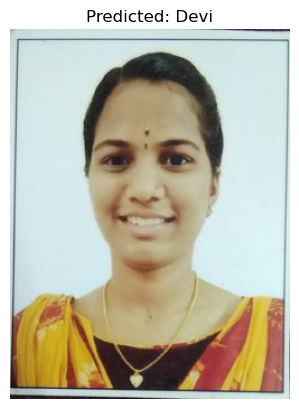

In [55]:
def load_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

def predict_image(model, image_path):
    image = load_image(image_path)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return "Ramya" if predicted.item() == 0 else "Devi"

def plot_image(image_path, prediction):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = r"C:\Users\Devi B\Downloads\f425d955b6e993b74d1fed34ec654503.jpg"
prediction = predict_image(model, image_path)
print(f'The predicted class for the image is: {prediction}')
plot_image(image_path, prediction)